<a href="https://colab.research.google.com/github/DiOs0/aprendizaje-automatico-252601/blob/main/02-PREPROCESAMIENTO/2_2_IdentificarMissingValuesOutliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Mounted at /content/drive


# 📁 **LECTURA DEL DATASET**

In [2]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [34]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**

In [39]:
def analisis_valores_faltantes(df):
    analisis = {}
    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary =  df.isnull().sum() # ← COMPLETAR

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = (df.isnull().sum() / len(df)) * 100  # ← COMPLETAR

    # TODO 1.3: Crear un dataframe solo con las columas y filas que tienen valores faltantes
    missing_info = pd.DataFrame({
        'Valores Faltantes': missing_summary,
        'Porcentaje (%)': missing_percent
    })  # ← COMPLETAR
    missing_info =  missing_info[missing_info['Valores Faltantes'] > 0].sort_values(by='Porcentaje (%)', ascending=False) # ← COMPLETAR - FILTRAR solo columnas con valores faltantes
    return missing_info

In [43]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,Valores Faltantes,Porcentaje (%)
estadoTran,4331,95.082327
estado,2622,57.563117
Terreno,1728,37.936334
Area Construcción,1259,27.639956
tipoTran,3,0.065862
Total M²,1,0.021954


In [44]:
# Para que solo me salga de las columnas con datos faltantes
columnas_con_faltantes = dfValoresFaltantes.index.tolist()
df_filtrado = df[columnas_con_faltantes]

In [45]:
def grafico_distribucion_faltantes(df):
    # TODO : Graficar un mapa de calor de los Valores Faltantes
    plt.figure(figsize=(12, 7))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Mapa de Calor de Valores Faltantes')
    # ← COMPLETAR
    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


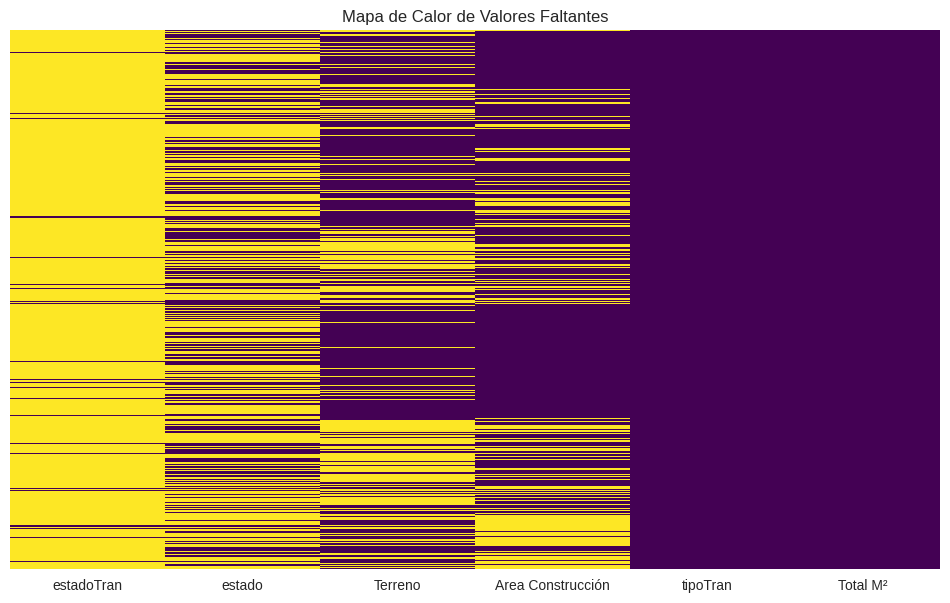

In [46]:
# Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(df_filtrado)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué columnas tienen el mayor porcentaje de valores faltantes?
La columna estadoTran con un 95%

¿Existe algún patrón visible en la matriz de valores faltantes? Sí, el patrón más claro es una exclusión mutua entre Terreno y Area Construcción, cuando uno tiene dato el otro no y viceversa.

¿Hay correlaciones entre los valores faltantes de diferentes columnas? Sí, existe una correlación negativa en la ausencia de datos entre Terreno y Area Construcción(exclusion mutua), lo que me dice que se registra una u otra medida, pero no ambas.

# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [55]:
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numericas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    #Seleccionamos solo las columnas numericas
    df_numerico = df.select_dtypes(include=np.number)

    # TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    correlation_matrix = df_numerico.corr()  # ← COMPLETAR
    print(correlation_matrix)

    # TODO 2.2: Visualizar matriz de correlación
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
    # ← COMPLETAR
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.show()



🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar      Agua    Alarma  Alcantarillado  \
Aeropuerto        1.000000   0.043580  0.226434  0.091897        0.174131   
Aestrenar         0.043580   1.000000  0.055431  0.138934        0.058481   
Agua              0.226434   0.055431  1.000000  0.099533        0.752246   
Alarma            0.091897   0.138934  0.099533  1.000000        0.078715   
Alcantarillado    0.174131   0.058481  0.752246  0.078715        1.000000   
...                    ...        ...       ...       ...             ...   
NoBan             0.034770  -0.050321  0.116138  0.118744        0.096470   
NoDorm            0.015644  -0.050109  0.117992  0.086505        0.102074   
lat              -0.019456  -0.008156 -0.025314  0.024617       -0.023849   
lng              -0.079188  -0.053115 -0.109250 -0.040333       -0.072445   
precio            0.000464  -0.014562  0.011571  0.035355        0.017334   

              

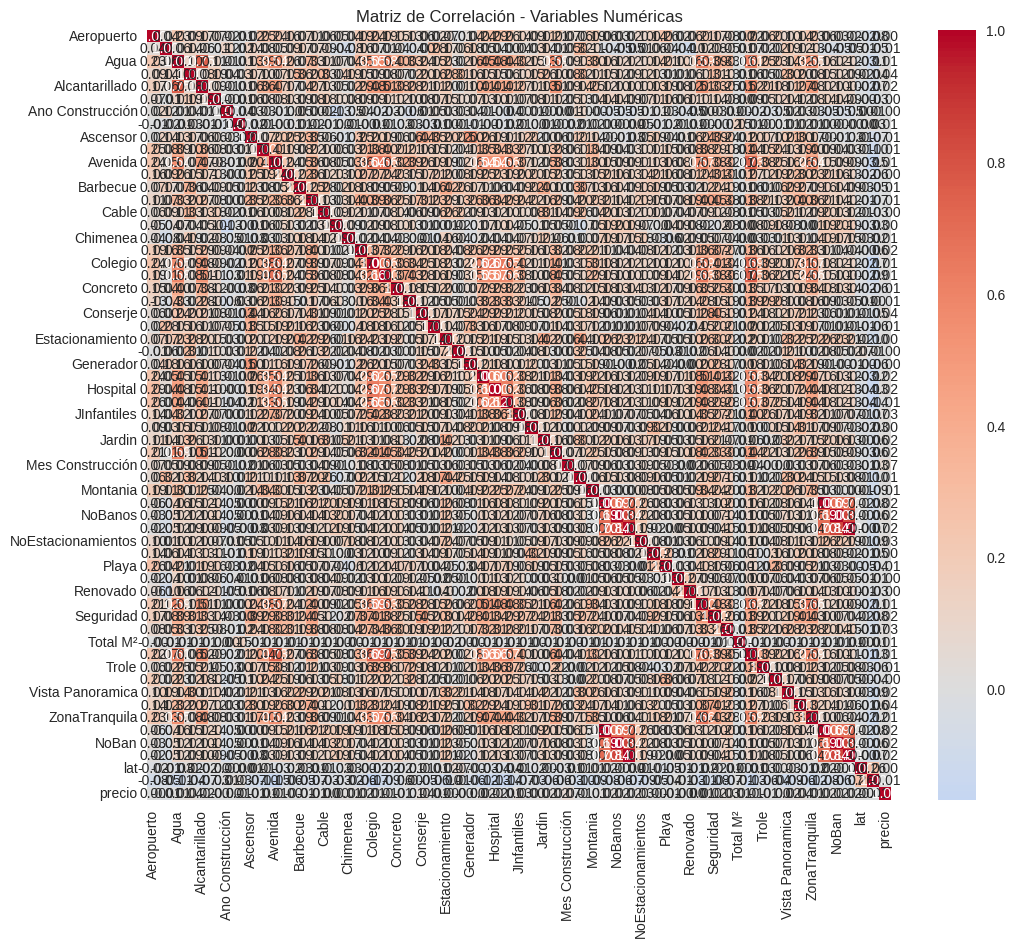

In [56]:
 # ← COMPLETAR Ejecutar análisis multivariable
analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**
Clasifique los tipos de valores faltantes de acuero a las relaciones que identifico previamente

Preguntas para el Análisis:
¿Los valores faltantes son MCAR, MAR o MNAR?
estadoTran (95% faltante) y estado (57% faltante): MNAR
Terreno y Area Construcción (38% y 28% faltante): MAR
tipoTran (3 faltantes) y Total M² (1 faltante): MCAR

¿Qué variables podrían predecir la presencia de valores faltantes?
La presencia de un valor en 'Area Construcción' podría predecir la ausencia de un valor en 'Terreno' (exclusion mutua), y viceversa.

# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [65]:
# Aplique una tecnica adecuada para cada columna de valor faltante.


# Vamos a hacer una copia del dataframe original
df_limpio = df.copy()

# Forzamos a que se hagan numericas, porque pueden existir columnas con letras tipo:42m2
columnas_numericas = ['Terreno', 'Area Construcción', 'Total M²']
for col in columnas_numericas:
    if col in df_limpio.columns:
        df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')

# 1. Eliminamos la columna 'estadoTran' por exceso de valores faltantes
if 'estadoTran' in df_limpio.columns:
    df_limpio.drop('estadoTran', axis=1, inplace=True)
    print("La Columna 'estadoTran' fue eliminada por la mayor cantidad de datos faltantes.")

# 2. Imputar 'estado' con la moda (el valor más frecuente)
if 'estado' in df_limpio.columns:
    moda_estado = df_limpio['estado'].mode()[0]
    df_limpio['estado'].fillna(moda_estado, inplace=True)
    print(f"La Columna 'estado' se imputo con la moda: '{moda_estado}'.")

# 3. Imputar 'Terreno' y 'Area Construcción' con la mediana
for col in ['Terreno', 'Area Construcción']:
    if col in df_limpio.columns:
        mediana_valor = df_limpio[col].median()
        df_limpio[col].fillna(mediana_valor, inplace=True)
        print(f"La Columna '{col}' se imputo con la mediana: {mediana_valor:.2f}.")

# 4. Al ser un numero minimo de datos faltantes se eliminan las filas donde 'tipoTran' o 'Total M²' son nulos
columnas_baja_ausencia = ['tipoTran', 'Total M²']
# Nos aseguramos que las columnas existan para eliminar las filas
columnas_existentes = [col for col in columnas_baja_ausencia if col in df_limpio.columns]
if columnas_existentes:
    filas_antes = len(df_limpio)
    df_limpio.dropna(subset=columnas_existentes, inplace=True)
    filas_despues = len(df_limpio)
    print(f"Se eliminaron {filas_antes - filas_despues} filas con valores faltantes en {columnas_existentes}.")
# VERIFICACIÓN FINAL
valores_faltantes_final = df_limpio.isnull().sum().sum()

# Muestra las primeras filas del DataFrame limpio
display(df_limpio.head())

La Columna 'estadoTran' fue eliminada por la mayor cantidad de datos faltantes.
La Columna 'estado' se imputo con la moda: 'Usada'.
La Columna 'Terreno' se imputo con la mediana: 190.69.
La Columna 'Area Construcción' se imputo con la mediana: 158.69.
Se eliminaron 4 filas con valores faltantes en ['tipoTran', 'Total M²'].


/tmp/ipython-input-1429897438.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio['estado'].fillna(moda_estado, inplace=True)
/tmp/ipython-input-1429897438.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoBan,NoDorm,NoMetros,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,2,3,93,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,1,3,88,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,1,2,46,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,3,7,432,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,1,3,71,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [73]:
# aplique el Chi-cuadrado (χ2) para determinar la relacion entre dos de los atributos categoricos
from scipy.stats import chi2_contingency


# Usamos chi cuadrado

# 1. Seleccionamos las dos variables categóricas de interés del DataFrame limpio.
var1 = 'estado'
var2 = 'tipoTran'

if var1 in df_limpio.columns and var2 in df_limpio.columns:
    print(f"Analizando la relación entre '{var1}' y '{var2}'...\n")

    # 2. Creamos una tabla de contingencia.
    contingency_table = pd.crosstab(df_limpio[var1], df_limpio[var2])

    print("--- Tabla de Contingencia ---")
    display(contingency_table)

    # 3. Aplicamos el test de Chi-cuadrado a la tabla de contingencia.
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # 4. Mostramos los resultados de forma mas clara.
    print("\n--- Resultados del Test Chi-cuadrado ---")
    print(f"Estadístico Chi-cuadrado (χ²): {chi2:.4f}")
    print(f"P-valor: {p_value:.4f}")
    print(f"Grados de libertad (dof): {dof}")

    # 5. Interpretamos el resultado basándonos en el p-valor.
    #    El umbral común para la significancia es 0.05.
    alpha = 0.05
    print("\n--- Conclusión ---")
    if p_value <= alpha:
        print(f"El p-valor ({p_value:.4f}) es menor o igual a {alpha}.")
        print("Resultado: Se rechaza la hipótesis nula. Hay una asociación estadísticamente significativa entre las variables.")
    else:
        print(f"El p-valor ({p_value:.4f}) es mayor que {alpha}.")
        print("Resultado: No se puede rechazar la hipótesis nula. No hay evidencia de una asociación significativa entre las variables.")

else:
    print(f"Error: Una o ambas columnas ('{var1}', '{var2}') no se encontraron en el DataFrame limpio.")

Analizando la relación entre 'estado' y 'tipoTran'...

--- Tabla de Contingencia ---


tipoTran,De Venta
estado,
En Construcción / En Planos,78
PROBABLE,4
Por Estrenar,491
RESERVADA,33
Reconstruida/ Renovada,136
Usada,3745
VENDIDA,64



--- Resultados del Test Chi-cuadrado ---
Estadístico Chi-cuadrado (χ²): 0.0000
P-valor: 1.0000
Grados de libertad (dof): 0

--- Conclusión ---
El p-valor (1.0000) es mayor que 0.05.
Resultado: No se puede rechazar la hipótesis nula. No hay evidencia de una asociación significativa entre las variables.


# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [74]:
# Aplique una tecnica adecuada para cada columna de valor faltante.


# 2. Seleccionamos solo las columnas de tipo 'object' (categóricas)
columnas_categoricas = df_limpio.select_dtypes(include=['object']).columns

# 3. Iteramos sobre cada columna categórica
for col in columnas_categoricas:
    # Verificamos si la columna tiene valores faltantes
    if df_limpio[col].isnull().sum() > 0:
        # Calculamos la moda (el valor más frecuente)
        moda = df_limpio[col].mode()[0]

        # Imputamos los valores faltantes con la moda
        df_limpio[col] = df_limpio[col].fillna(moda)

        print(f"La Columna '{col}': Valores faltantes imputados con la moda ('{moda}').")

# --- VERIFICACIÓN FINAL ---
print("\n--- Verificación Post-Imputación Categórica ---")

# Calculamos los valores faltantes restantes en las columnas categóricas
faltantes_restantes = df_limpio[columnas_categoricas].isnull().sum().sum()

if faltantes_restantes == 0:
    print("No quedan valores faltantes en las columnas categóricas.")
else:
    print(f"Aún quedan {faltantes_restantes} valores faltantes en las columnas categóricas.")

# Mostramos un resumen de los nulos en todo el DataFrame para ver el estado general
print("\nResumen de valores faltantes en todo el DataFrame:")
display(df_limpio.isnull().sum())



--- Verificación Post-Imputación Categórica ---
No quedan valores faltantes en las columnas categóricas.

Resumen de valores faltantes en todo el DataFrame:


,0
_id,0
estado,0
direccion,0
Aeropuerto,0
Aestrenar,0
...,...
precio,0
price,0
tipoInv,0
tipoTran,0


# ✅ **RESULTADOS:**
¿Qué columnas presentaron mayores desafíos para la imputación?
Las columnas estadoTran (95% faltante) y estado (57% faltante) fueron las más desafiantes. Imputar un porcentaje tan masivo de datos no es rellenar huecos, sino fabricar información, lo que introduce un sesgo.

¿En qué casos consideraron que la eliminación era mejor que la imputación?
La eliminación fue la mejor opción en dos casos extremos: para la columna estadoTran donde más del 90% de los datos faltaban, y para las filas con datos faltantes en tipoTran y Total M².

¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?
MCAR: Permite usar métodos simples como la eliminación (si son pocos) o la imputación con la media/mediana, ya que los datos restantes son una muestra representativa.
MAR: Requiere métodos más avanzados. La imputación simple puede sesgar los resultados.
MNAR: Es el más complejo.

# 🚀 ¡TALLER FINALIZADO!"